# Homicides Analysis

For this first project, I am interested in exploring and visualizing crime rates worldwide in order to have a general idea of the phenomenon. I will be using data for Intentional homicides (per 100.000 people) made available by World Bank here: https://data.worldbank.org/indicator/VC.IHR.PSRC.P5

**Skills:** pandas, numpy, seaborn, matplotlib, plotly, choropleth

In [545]:
#Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
#This line is required to show matplotlib's plots in Jupyter Notebook
%matplotlib inline

In [3]:
#Read first file from downloaded data from World Bank
df = pd.read_csv('API_VC.IHR.PSRC.P5_DS2_es_csv_v2/Metadata_Country_API_VC.IHR.PSRC.P5_DS2_es_csv_v2.csv')

In [4]:
# Check first five rows of data
df.head()

,Country Name,Country Code,Region,Income_Group,Unnamed: 4
0,Aruba,ABW,NaN,Ingreso alto,NaN
1,Afganistán,AFG,Asia meridional,Países de ingreso bajo,NaN
2,Angola,AGO,África al sur del Sahara (excluido altos ingre...,Países de ingreso mediano bajo,NaN
3,Albania,ALB,Europa y Asia central (excluido altos ingresos),Ingreso mediano alto,NaN
4,Andorra,AND,NaN,Ingreso alto,NaN


In [5]:
# List categories of Income Group in data
df['Income_Group'].value_counts()

Ingreso alto                      77
Ingreso mediano alto              56
Países de ingreso mediano bajo    53
Agregados                         47
Países de ingreso bajo            31
Name: Income_Group, dtype: int64

In [6]:
##Read second file out of downloaded data from World Bank. This seems to be just a description of the homicides indicador measured for countries
df2 = pd.read_csv('API_VC.IHR.PSRC.P5_DS2_es_csv_v2/Metadata_Indicator_API_VC.IHR.PSRC.P5_DS2_es_csv_v2.csv')

In [8]:
#Data only has one row
df2.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,VC.IHR.PSRC.P5,Homicidios intencionales (por cada 100.000 hab...,Los homicidios intencionales son cálculos de h...,Base de datos de Estadísticas de homicidios in...,NaN


In [7]:
# Check complete description of the indicator.
df2.iloc[0]['SOURCE_NOTE']

'Los homicidios intencionales son cálculos de homicidios ilegales cometidos en forma intencional como resultado de conflictos internos, violencia interpersonal, conflictos violentos por la tierra o sus recursos, violencia entre pandillas por el territorio o el control y asesinatos y violencia que atenta contra la integridad física por parte de grupos armados. El homicidio intencional no incluye todos los asesinatos intencionales; la diferencia suele encontrarse en la organización del asesinato. Por lo general, las personas o grupos pequeños cometen homicidios, mientras que el asesinato en conflictos armados suele ser cometido por grupos organizados de varios cientos de miembros y por ende, se excluye.'

In [65]:
# Read third file from downloaded data from World Bank. I skip first 4 rows for pandas to actually read the file.
# This is homicides rates (per 100.000 people) by country and year since 1960.
df3 = pd.read_csv('API_VC.IHR.PSRC.P5_DS2_es_csv_v2/API_VC.IHR.PSRC.P5_DS2_es_csv_v2.csv',skiprows=4)

In [10]:
#Check first five rows of the data
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Homicidios intencionales (por cada 100.000 hab...,VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,3.9,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afganistán,AFG,Homicidios intencionales (por cada 100.000 hab...,VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,3.5,4.3,6.6,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Homicidios intencionales (por cada 100.000 hab...,VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.5,NaN,NaN,NaN,NaN,9.6,NaN,NaN,NaN
3,Albania,ALB,Homicidios intencionales (por cada 100.000 hab...,VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,2.9,4.4,4.9,5.5,4.3,4.0,2.3,NaN,NaN,NaN
4,Andorra,AND,Homicidios intencionales (por cada 100.000 hab...,VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,1.2,1.2,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [48]:
# Check my birth and home country's homicides rates
df3[(df3['Country Code'] == 'COL') | (df3['Country Code'] == 'CHL')] 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
37,Chile,CHL,Homicidios intencionales (por cada 100.000 hab...,VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,3.7,3.2,3.7,2.5,3.2,3.6,NaN,NaN,NaN,NaN
43,Colombia,COL,Homicidios intencionales (por cada 100.000 hab...,VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,34.0,32.7,34.1,31.3,32.6,27.9,26.5,NaN,NaN,NaN


In [13]:
# Check number of total columns
df3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')

In [20]:
# Dimensions of the data: 264 rows and 63 columns
df3.shape

(264, 63)

**Cleaning Data**

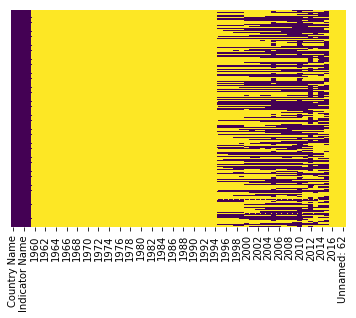

In [38]:
# Using seaborn library I can see there is no data before around 1994 for any country, so I could basically drop those columns
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

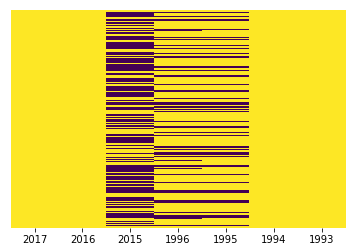

In [66]:
# Check if there is real data before 1995 and after 2015
sns.heatmap(df3[['2017','2016','2015','1996','1995','1994','1993']].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [67]:
# Doublecheck there is no real data before 1995 and after 2015
print('1995-->', df3['1995'].unique())
print('1994-->',df3['1994'].unique())
print('1993-->',df3['1993'].unique())
print('2015-->', df3['2015'].unique())
print('2016-->',df3['2016'].unique())
print('2017-->',df3['2017'].unique())

1995--> [         nan   6.68555176   7.81232965   3.59893807   1.79927429
   1.03331509   5.91147813   9.343765     1.83604638   1.16830719
  69.67263381   5.30424761   1.70553593   1.71611082   1.1464901
  12.7205747    1.04243724  17.07491445   2.85837235   2.30964046
   1.46863785   7.71314365   1.41494286  32.54897947  14.97295938
   3.55536441   2.86505134   4.36626278   1.19081972   0.
   2.10049401   1.77643468  31.68778915   0.543833    15.36495408
  11.65035436   3.554407     9.27622272  13.83261543   0.49077105
  11.55654179   9.10400461  16.91940488   2.19857919   1.9111222
  22.5875525   15.24679537   1.938768     0.98644306   1.0884176
  14.08331795   2.22182989  23.34114433   1.19401191   3.3420111
   1.46481262 139.13207885   2.38410369   2.23781345   0.94030225
   7.61439739   7.53194062   6.42309832   8.62060163   8.11268341
   5.04813464  18.50361283  20.33591335  64.91652658]
1994--> [nan]
1993--> [nan]
2015--> [  nan   9.6   2.3   0.    3.8   0.7   6.5   2.5   1.   

In [68]:
# Drop columns of years between 1960 and 1994
df3.drop(labels=['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968','1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977','1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994','2016','2017'],axis=1,inplace=True)

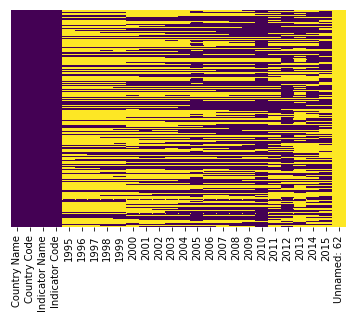

In [69]:
# Plot heatmap to see missing data after dropping columns
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [70]:
# Remove last column as well
df3.drop(labels='Unnamed: 62',axis=1,inplace=True)

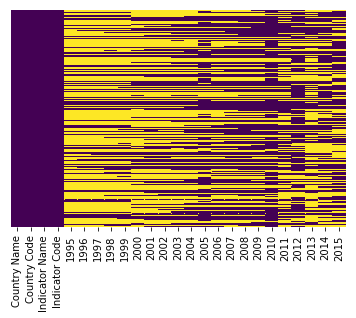

In [71]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [76]:
# New dimensions after dropping columns
df3.shape

(264, 25)

In [251]:
# Remove indicator code column
df3.drop(['Indicator Code','Indicator Name'],axis=1, inplace=True)

**Exploring Data**

In [307]:
# Calculate the max homicides rate for each country
df3['Max Rate'] = df3[df3.columns[2:]].max(axis=1)

In [309]:
# Query the max homicides rate for Colombia
df3[df3['Country Name'] == 'Colombia']['Max Rate']

43    71.7869
Name: Max Rate, dtype: float64

In [311]:
# Sort the data by Max Rate descending
df3.sort_values(by='Max Rate',ascending=False).head()

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Max Rate
209,El Salvador,SLV,139.132079,117.277282,112.568660,94.996731,65.047181,40.3,37.8,37.9,...,58.4,52.9,72.8,66.0,72.2,42.7,41.3,64.2,108.6,139.132079
95,Honduras,HND,NaN,NaN,NaN,NaN,42.084253,50.9,54.7,55.7,...,50.3,61.4,71.5,83.1,93.2,92.7,81.9,74.6,63.8,93.200000
43,Colombia,COL,69.672634,71.786900,67.184550,60.084655,62.292449,65.7,67.9,68.3,...,34.8,33.2,34.0,32.7,34.1,31.3,32.6,27.9,26.5,71.786900
111,Iraq,IRQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.100000
261,Sudáfrica,ZAF,64.916527,60.390167,57.112395,57.741681,51.212871,48.5,47.0,46.6,...,37.2,36.0,33.0,30.9,29.9,30.7,31.7,33.0,34.3,64.916527


In [312]:
# Find out the year of the max homicides rates for each country
df3['Year Max Rate'] = df3[df3.columns[2:-2]].idxmax(axis=1)

In [313]:
# Find out the year of the max homicides rate for Colombia
df3[df3['Country Name'] == 'Colombia']['Year Max Rate']

43    1996
Name: Year Max Rate, dtype: object

In [315]:
# List the countries with the highest homicides rates in 1995-2015 period
df3.sort_values(by='Max Rate',ascending=False).head()

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,Max Rate,Year Max Rate
209,El Salvador,SLV,139.132079,117.277282,112.568660,94.996731,65.047181,40.3,37.8,37.9,...,52.9,72.8,66.0,72.2,42.7,41.3,64.2,108.6,139.132079,1995
95,Honduras,HND,NaN,NaN,NaN,NaN,42.084253,50.9,54.7,55.7,...,61.4,71.5,83.1,93.2,92.7,81.9,74.6,63.8,93.200000,2011
43,Colombia,COL,69.672634,71.786900,67.184550,60.084655,62.292449,65.7,67.9,68.3,...,33.2,34.0,32.7,34.1,31.3,32.6,27.9,26.5,71.786900,1996
111,Iraq,IRQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.100000,2007
261,Sudáfrica,ZAF,64.916527,60.390167,57.112395,57.741681,51.212871,48.5,47.0,46.6,...,36.0,33.0,30.9,29.9,30.7,31.7,33.0,34.3,64.916527,1995


**Reshaping Data**

The idea is to transform the data analysed so far to practice different operations with pandas

In [344]:
# Copy dataframe 3 to analyze data using a different structure of the data
df4 = df3.drop(['Max Rate','Year Max Rate'],axis=1).copy()

In [345]:
# Check first five rows of data
df4.head()

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,...,9.9,5.9,4.9,3.9,3.9,NaN,NaN,NaN,NaN,NaN
1,Afganistán,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.1,3.5,4.3,6.6,NaN,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.5,NaN,NaN,NaN,NaN,9.6
3,Albania,ALB,6.685552,7.967623,49.872215,18.609715,16.142024,NaN,NaN,NaN,...,3.1,3.5,3.1,2.9,4.4,4.9,5.5,4.3,4.0,2.3
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1.2,1.2,1.2,1.2,0.0,0.0,0.0,0.0


In [346]:
# Reshaping data so that years are taken to row level instead of being columns
df4 = df4.melt(id_vars=['Country Name','Country Code'],var_name='Year',value_name='Rate')

In [348]:
# Drop NA values
df4.dropna(inplace=True)

In [349]:
# Highest rate of homicides in 1995-2015 period
df4[df4['Rate'] == np.max(df4['Rate'])]

,Country Name,Country Code,Year,Rate
209,El Salvador,SLV,1995,139.132079


In [350]:
# Lowest rates of homicides in 1995-2015 period (including Rate 0)
df4[df4['Rate'] == np.min(df4['Rate'])]

,Country Name,Country Code,Year,Rate
112,Islandia,ISL,1995,0.0
135,Liechtenstein,LIE,1995,0.0
399,Liechtenstein,LIE,1996,0.0
663,Liechtenstein,LIE,1997,0.0
781,Islas Vírgenes Británicas,VGB,1997,0.0
817,Bermudas,BMU,1998,0.0
904,Islandia,ISL,1998,0.0
927,Liechtenstein,LIE,1998,0.0
1018,Islas Turcas y Caicos,TCA,1998,0.0
1045,Islas Vírgenes Británicas,VGB,1998,0.0


In [351]:
# Countries with the lowest homicides rates in 1995-2015 period
df4[df4['Rate'] == np.min(df4['Rate'])]['Country Name'].unique()

array(['Islandia', 'Liechtenstein', 'Islas Vírgenes Británicas',
       'Bermudas', 'Islas Turcas y Caicos', 'San Marino', 'Islas Caimán',
       'Tuvalu', 'Malta', 'Andorra', 'Mónaco', 'Luxemburgo',
       'Región Administrativa Especial de Macao, China'], dtype=object)

In [360]:
# Lowest homicides rates in 1995-2015 period (No including Rate 0)
min_rate = np.min(df4[df4['Rate'] != 0.0])['Rate']
df4[df4['Rate'] == min_rate]

,Country Name,Country Code,Year,Rate
1429,Irlanda,IRL,2000,0.1
1805,Suecia,SWE,2001,0.1


In [259]:
# Five most violent countries in the period 1995-2015 in terms of homicides rate (per 100.000 people)
df4.groupby(['Country Name']).mean().sort_values(by='Rate',ascending=False).head()

,Rate
Country Name,
El Salvador,68.448663
Honduras,63.675544
Colombia,47.348628
Jamaica,44.546653
Iraq,43.366667


In [283]:
# Homicides rate by country and year and sorted by rate descending. Remove head() from the code if want to see all results
df4.groupby(['Country Name','Year']).max().sort_values(by='Rate',ascending=False).head()

Country Code        Rate
Country Name Year                         
El Salvador  1995          SLV  139.132079
             1996          SLV  117.277282
             1997          SLV  112.568660
             2015          SLV  108.600000
             1998          SLV   94.996731

**Visualizing Data**

In [361]:
df4['Year'] = df4['Year'].apply(int)

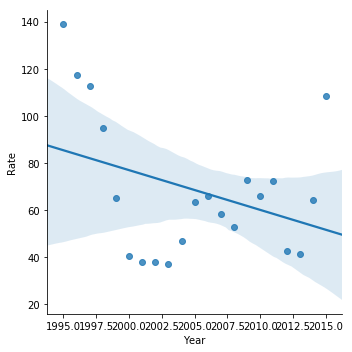

In [421]:
sns.lmplot(x='Year',y='Rate',data=df4[df4['Country Name'] == 'El Salvador'])

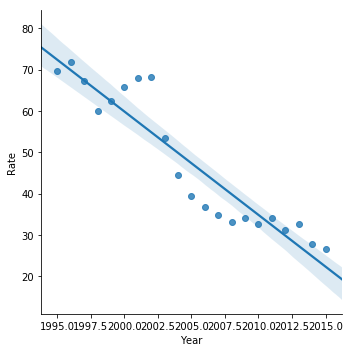

In [365]:
sns.lmplot(x='Year',y='Rate',data=df4[df4['Country Name'] == 'Colombia'])

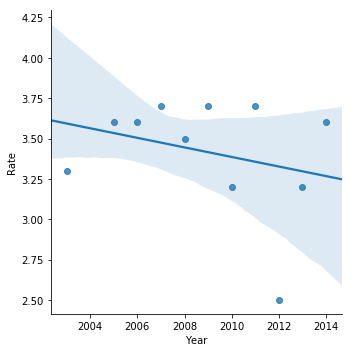

In [371]:
sns.lmplot(x='Year',y='Rate',data=df4[df4['Country Name'] == 'Chile'])

In [377]:
# Most violent years in 1995-2015 period
df4.groupby('Year').mean().sort_values(by='Rate',ascending=False)

,Rate
Year,
1995,10.668115
1996,10.124165
1997,9.926572
2002,9.054717
2009,8.748734
1998,8.736466
2000,8.596264
2010,8.571204
2001,8.559515


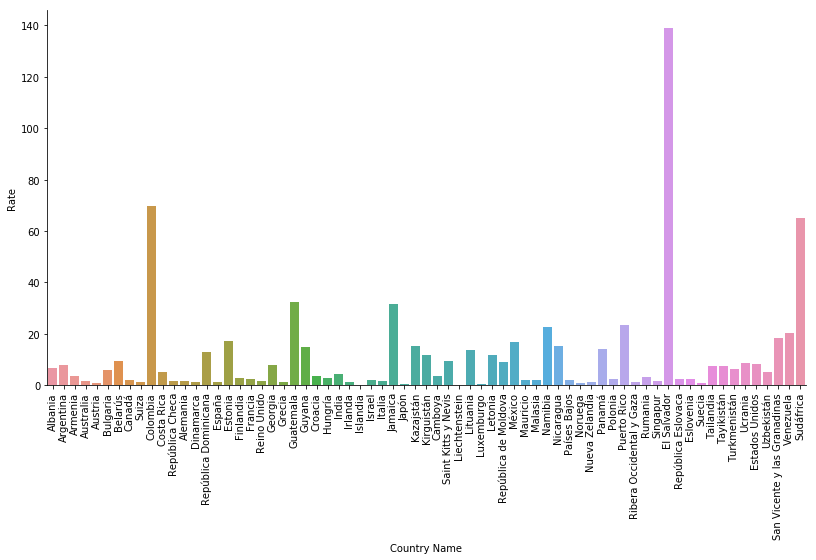

In [420]:
# 1995. Most violent year in terms of homicides rate in 1995-2015 period
g = sns.factorplot(x='Country Name',y='Rate',data=df4[df4['Year']==1995],size=6,aspect=2,kind='bar')
g.set_xticklabels(df4['Country Name'].unique(),rotation=90) 

In [423]:
# Import plotly libraries that allow to create choropleth maps
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [424]:
# This line is necessary to work with plotly offline. Otherwise, one would need to have an account on plotly website
init_notebook_mode(connected=True) 

In [449]:
# Filter data for year 1995
df4_1995 = df4[df4['Year']==1995]
# Create a data object. This is required by plotly.
data = dict(
        type = 'choropleth',
        locationmode = 'worldwide',
        locations = df4_1995['Country Code'],
        z = df4_1995['Rate'],
        text = df4_1995['Country Name'],
        colorbar = {'title' : 'Homicide Rates'},
      ) 

In [450]:
# Create a layout object. This is required by plotly.
layout = dict(
    title = 'Intentional Homicide Rates - 1995',
    geo = dict(
        showframe = False,
        projection = {'type':'Mercator'}
    )
)

In [451]:
# Plot choropleth map with plotly
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [518]:
# Merge rates dataframe with income_group dataframe (this data was loaded in df in the beggining of the notebook)
df5 = df4.merge(df,on='Country Code')

In [519]:
# Drop unnecessary columns
df5.drop(['Unnamed: 4','Country Name_y'],axis=1, inplace=True)

In [527]:
# Rename column
df5.rename(columns={'Country Name_x':'Country Name'},inplace=True)

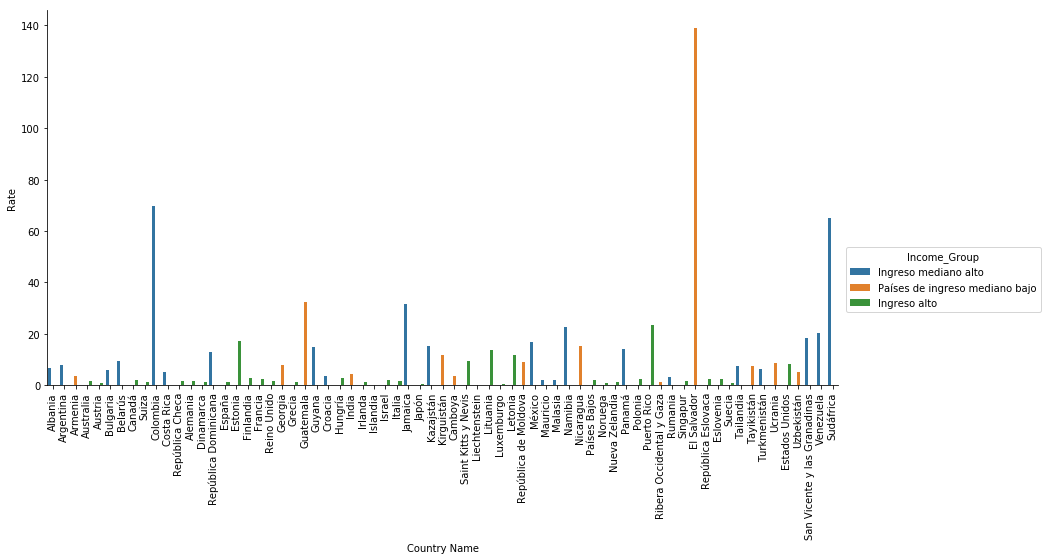

In [543]:
# Plot homicide rate for each country in 1995, grouped by income category to which the country belongs.
g = sns.factorplot(x='Country Name',y='Rate',hue='Income_Group',data=df5[df5['Year']==1995],size=6,aspect=2,kind='bar')
g.set_xticklabels(df5['Country Name'].unique(),rotation=90)

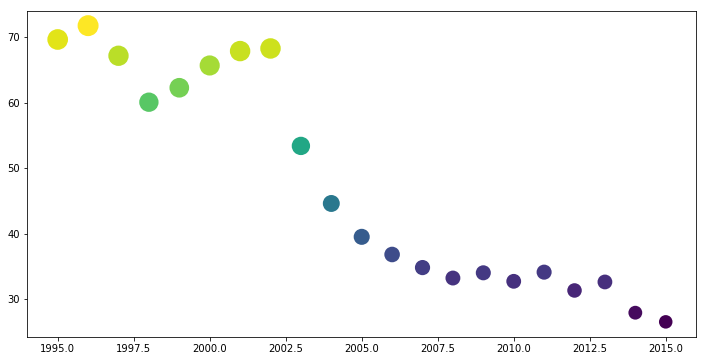

In [610]:
# Plot homicide rate for Colombia during 1995-2015 period. It can be seen how the rate has been decreasing over the years.
plt.figure(figsize=(12,6))
plt.scatter(x=df5[df5['Country Name']=='Colombia']['Year'],y=df5[df5['Country Name']=='Colombia']['Rate'],s=df5[df5['Country Name']=='Colombia']['Rate']*5,c=df5[df5['Country Name']=='Colombia']['Rate']*5, linewidth=2)

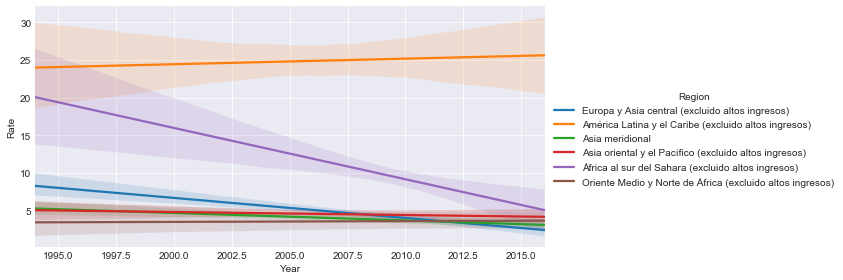

In [664]:
# Plot homicide rate for every region measured by World Bank in the time period 1995-2015
sns.lmplot(x='Year',y='Rate',data=df5,hue='Region',size=4,aspect=2,scatter=False)